In [1]:
### Evaluators and Users:
###
### Please click the Voila button above to open the dashboard.

In [2]:
from __future__ import print_function
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import statsmodels.api as sm
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


sns.set(style="darkgrid")

# Lists for dropdown selection boxes.
list_genres = ['Action', 'Adventure', 'Fighting',
         'Misc', 'Platform', 'Puzzle',
         'Racing', 'Role-Playing', 'Shooter',
         'Simulation', 'Sports', 'Strategy']

list_years = list(range(2020, 2041))

# Get the path of the data file.
# On my computer, this is: '/Users/kennetheaton/Notebooks/vgsales.csv'
pathname = 'https://raw.githubusercontent.com/techguy682/vgsalesprojectv2/master/vgsales.csv'

# Cleans up data and indexes it by rank, removing row numbers.
df_all = pd.read_csv(pathname,
                 #index_col=0,
                 #header=0,
                 names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
                        'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'])
# Clean the Year data to be interpreted as an Integer instead of a float.


# Creates a dataframe specifically for NA sales. Automatically converts year back to Int64.
# This should make it much easier to create charts as there is only one type of sales
# to be dependent on any other variables.
df_NAsales = pd.read_csv(pathname,
                         header=0,
                         names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
                        'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
                        usecols=['Platform','Year','Genre','Publisher','NA_Sales'],
                        dtype={'Year':'Int64'})

# Data sets for each genre, using years from 2000-2015.
# First, clean the data and select rows with non-null values inclusively between 2000 and 2015.
df_2000_2015_NAsales=df_NAsales[(df_NAsales['Year'] >= 2000) & (df_NAsales['Year'] <= 2015) & (df_NAsales['Year'].notnull())]

# Now split that data set by each of the listed genres.
df_NA_action = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Action')]
df_NA_adventure = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Adventure')]
df_NA_fighting = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Fighting')]
df_NA_misc = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Misc')]
df_NA_platform = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Platform')]
df_NA_puzzle = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Puzzle')]
df_NA_racing = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Racing')]
df_NA_rpg = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Role-Playing')]
df_NA_shooter = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Shooter')]
df_NA_simulation = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Simulation')]
df_NA_sports = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Sports')]
df_NA_strategy = df_2000_2015_NAsales[(df_2000_2015_NAsales['Genre'] == 'Strategy')]

# Group the genre sets by year. They will be a GroupBy object, ordered chronologically.
df_NA_action_ordered = df_NA_action.groupby(['Year'])
df_NA_adventure_ordered = df_NA_adventure.groupby(['Year'])
df_NA_fighting_ordered = df_NA_fighting.groupby(['Year'])
df_NA_misc_ordered = df_NA_misc.groupby(['Year'])
df_NA_platform_ordered = df_NA_platform.groupby(['Year'])
df_NA_puzzle_ordered = df_NA_puzzle.groupby(['Year'])
df_NA_racing_ordered = df_NA_racing.groupby(['Year'])
df_NA_rpg_ordered = df_NA_rpg.groupby(['Year'])
df_NA_shooter_ordered = df_NA_shooter.groupby(['Year'])
df_NA_simulation_ordered = df_NA_simulation.groupby(['Year'])
df_NA_sports_ordered = df_NA_sports.groupby(['Year'])
df_NA_strategy_ordered = df_NA_strategy.groupby(['Year'])

# Create a dict for genre key/value pairs for later use.
genres = {'Action': df_NA_action, 'Adventure': df_NA_adventure, 'Fighting': df_NA_fighting,
         'Misc': df_NA_misc, 'Platform': df_NA_platform, 'Puzzle': df_NA_puzzle,
         'Racing': df_NA_racing, 'Role-Playing': df_NA_rpg, 'Shooter': df_NA_shooter,
         'Simulation': df_NA_simulation, 'Sports': df_NA_sports, 'Strategy': df_NA_strategy}

# Create a dict for the ordered/grouped version of each genre dataframe for easier access.
genres_ordered = {'Action': df_NA_action_ordered, 'Adventure': df_NA_adventure_ordered, 'Fighting': df_NA_fighting_ordered,
         'Misc': df_NA_misc_ordered, 'Platform': df_NA_platform_ordered, 'Puzzle': df_NA_puzzle_ordered,
         'Racing': df_NA_racing_ordered, 'Role-Playing': df_NA_rpg_ordered, 'Shooter': df_NA_shooter_ordered,
         'Simulation': df_NA_simulation_ordered, 'Sports': df_NA_sports_ordered, 'Strategy': df_NA_strategy_ordered}





In [3]:
# Future functionality:
# Implement analysis on data sets for EU, JP, Other, and Global sales data.
# Mac: 'CTRL' + '/' or 'CMD' + '/' to comment/uncomment highlighted blocks.

# df_EUsales = pd.read_csv(pathname,
#                          header=0,
#                          names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
#                         'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
#                         usecols=['Platform','Year','Genre','Publisher','EU_Sales'],
#                         dtype={'Year':'Int64'})
# df_JPsales = pd.read_csv(pathname,
#                          header=0,
#                          names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
#                         'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
#                         usecols=['Platform','Year','Genre','Publisher','JP_Sales'],
#                         dtype={'Year':'Int64'})
# df_OTHERsales = pd.read_csv(pathname,
#                          header=0,
#                          names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
#                         'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
#                         usecols=['Platform','Year','Genre','Publisher','Other_Sales'],
#                         dtype={'Year':'Int64'})
# df_GLOBALsales = pd.read_csv(pathname,
#                          header=0,
#                          names=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
#                         'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'],
#                         usecols=['Platform','Year','Genre','Publisher','Global_Sales'],
#                         dtype={'Year':'Int64'})

In [4]:
# Displays a publisher's total recorded sales.
# df_publishersales_total = df_NAsales.groupby(['Publisher'])#,'Year'])
# df_publishersales_total = df_publishersales_total['NA_Sales'].agg(np.sum)
# df_publishersales_total = df_publishersales_total.plot.bar().set(ylabel='Sales (in millions)',title='Publisher\'s Total Game Sales')
#print(df_publishersales_total)

# Welcome to Videogame Sales Consulting
---

## Historical (Descriptive) Sales Trends



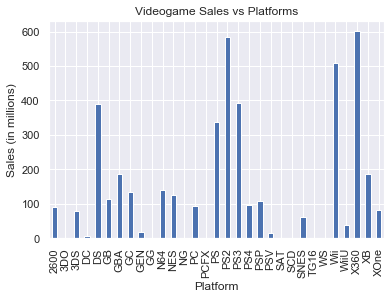

In [5]:
# Chart: sales vs platform.
# DATA METHOD: Descriptive.
NAsalesVSplatform = df_NAsales.groupby(['Platform'])
NAsalesVSplatform = NAsalesVSplatform['NA_Sales'].agg(np.sum)
NAsalesVSplatform = NAsalesVSplatform.plot.bar().set(ylabel='Sales (in millions)', title='Videogame Sales vs Platforms')



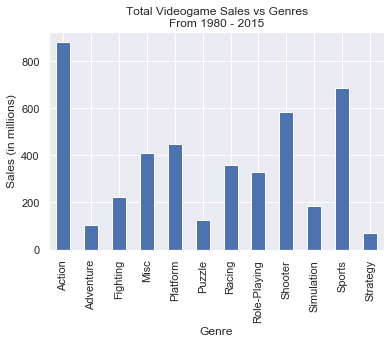

In [6]:
# Chart: sales vs genre.  
# DATA METHOD: Descriptive.
NAsalesVSgenre = df_NAsales.groupby(['Genre'])
NAsalesVSgenre = NAsalesVSgenre['NA_Sales'].agg(np.sum)
NAsalesVSgenre = NAsalesVSgenre.plot.bar().set(ylabel='Sales (in millions)', title='Total Videogame Sales vs Genres\nFrom 1980 - 2015')


In [7]:
# # Line chart: Sales of a genre from 1980-2015. Replaced with below chart from 2000-2015.
# # DATA METHOD: Descriptive.
# # Highlight and uncomment selection to make it work again.

# # Clean the data to end at 2015, the last year with sufficient information.
# df_pre2015sales=df_NAsales[(df_NAsales['Year'] <= 2015) & (df_NAsales['Year'].notnull())] # Add 1
# df_NAsp = df_pre2015sales.groupby(['Year','Genre'])


# # Grouping the NA_Sales data by year and genre. Original. Uncomment to work.
# #df_NAsp = df_NAsales.groupby(['Year','Genre'])
  
# #plot data
# plt.rcdefaults()
# fig, ax = plt.subplots(figsize=(20,10))
# ax.tick_params(axis='both', which='major', labelsize=20)
# ax.set_title('Sales of Videogame Genres\nFrom 1980 - 2015',fontsize=20)
# ax.set_xlabel('Year', fontsize=20)
# ax.set_ylabel('Sales (in millions)', fontsize=20)
# plt.rcParams.update({'legend.fontsize' : 20, 'legend.title_fontsize' : 30})



# #plt.draw()
# # Use unstack()
# # ORIGINAL: df_NAsp.count()['NA_Sales'].unstack().plot(ax=ax) 
# df_NAsp.sum()['NA_Sales'].unstack().plot(ax=ax) 
# ax.grid(color='black',linestyle='-', linewidth=1, visible=True)


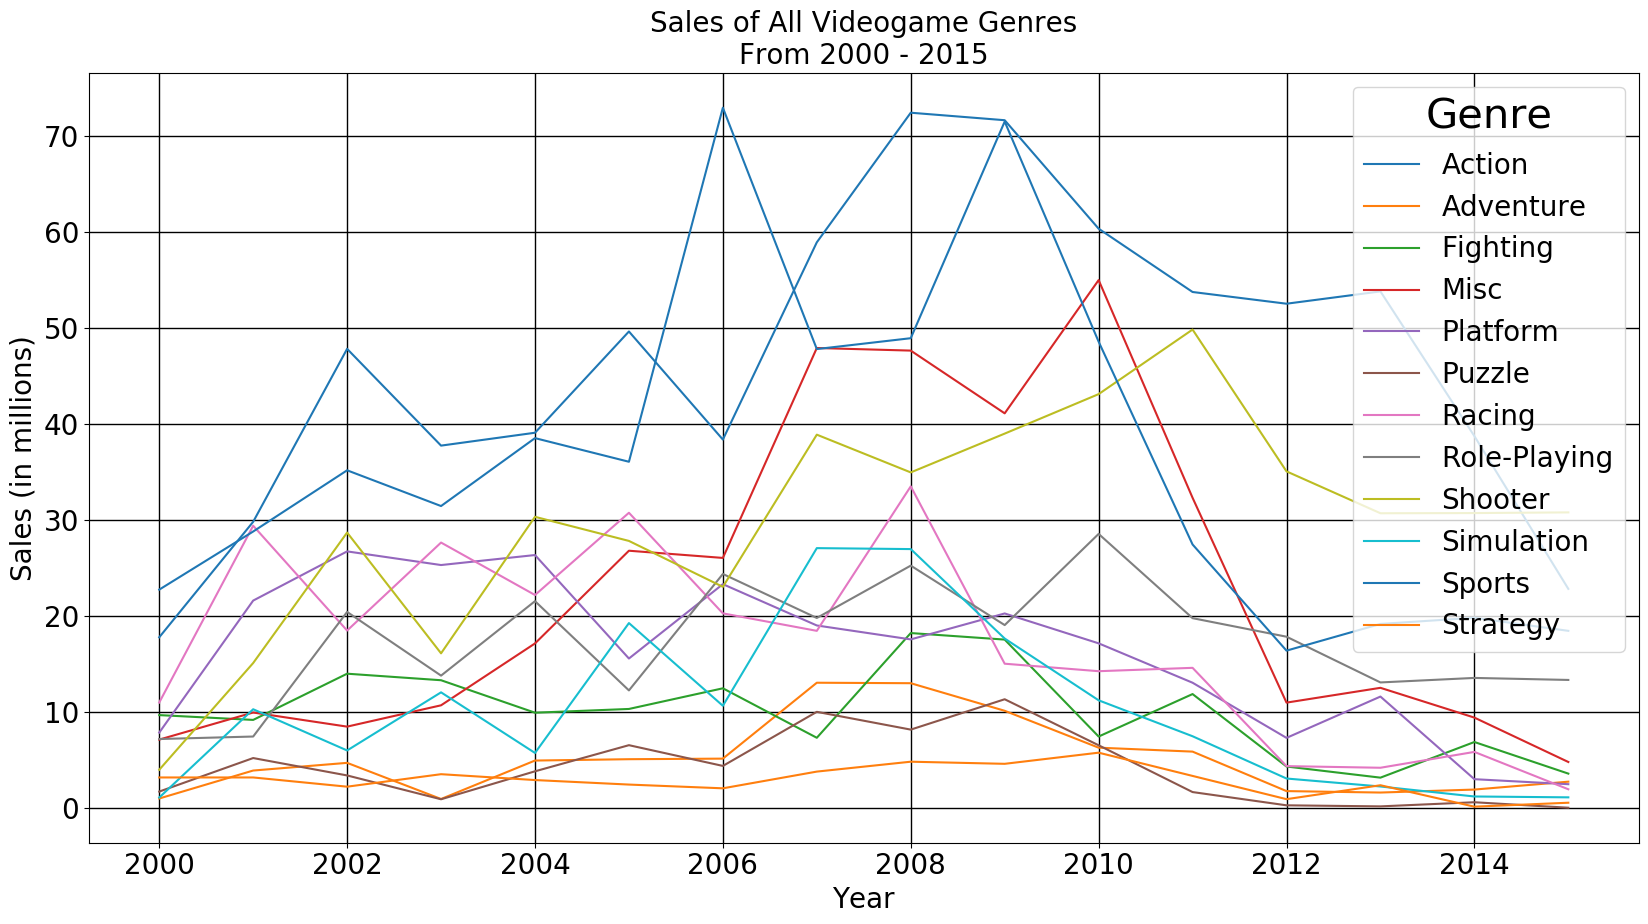

In [8]:
# Line chart: Sales of a genre from 2000-2015.
# DATA METHOD: Descriptive. 

# Clean the data to end at 2015, the last year with sufficient information.
# df_2000_2015sales=df_NAsales[(df_NAsales['Year'] >= 2000) & (df_NAsales['Year'] <= 2015) & (df_NAsales['Year'].notnull())] # Add 1
df_NAsp2 = df_2000_2015_NAsales.groupby(['Year','Genre'])


# Grouping the NA_Sales data by year and genre. Original. Uncomment to work.
#df_NAsp = df_NAsales.groupby(['Year','Genre'])



# A way to list the GroupBy data object
# for genre, item in df_NAsp:
#     #print(df_NAsp.get_group(genre), "\n\n")
#     temp_vars = df_NAsp.get_group(genre)
#     print(genre)#, df_NAsp.get_group('NA_sales'))
    
#plot data
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Sales of All Videogame Genres\nFrom 2000 - 2015',fontsize=20)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Sales (in millions)', fontsize=20)
plt.rcParams.update({'legend.fontsize' : 20, 'legend.title_fontsize' : 30})



#plt.draw()
# Use unstack()
#ORIGINAL: df_NAsp2.count()['NA_Sales'].unstack().plot(ax=ax) 
df_NAsp2.sum()['NA_Sales'].unstack().plot(ax=ax) 
ax.grid(color='black',linestyle='-', linewidth=1, visible=True)

## Custom Genre Sales Chart

In [9]:
# Create a chart for a selected genre.
# DATA METHOD: Descriptive.

def create_historic_chart(genre_arg):
    # Get the genre
    desired_genre = genre_arg
    title_string = 'Sales of ' + desired_genre + ' Games\nFrom 2000 - 2015'
    
    # Start creating a new plot.
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20,10))
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.set_title(title_string,fontsize=30)
    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Sales (in millions)', fontsize=20)
    plt.rcParams.update({'legend.fontsize' : 20, 'legend.title_fontsize' : 30})

    # Plot a single genre, using the groupby ordered object for that genre.
    #genres_ordered['Action'].count()['NA_Sales'].plot(ax=ax) 
    genres_ordered[desired_genre].sum().plot(ax=ax)
    ax.grid(color='black',linestyle='-', linewidth=1, visible=True)

print('CHOOSE GENRE SALES CHART TO DISPLAY')

def gather_chart_input(Genre):
    return create_historic_chart(Genre)

interact(gather_chart_input, Genre=list_genres)

# Printing a groupby object.
# for key, item in df_NA_strategy_ordered:
#     print(df_NA_strategy_ordered.get_group(key), "\n\n")

CHOOSE GENRE SALES CHART TO DISPLAY


interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Fighting', 'Misc', 'Platf…

<function __main__.gather_chart_input(Genre)>

---
## Potential (Predictive) Sales Trends
#### By Genre and Year of Release

In [10]:
# Defines an interactive prediction function to be called.
# DATA METHOD: Predictive.
# Linear regression analysis to predict sales of input genre for input year of game release.
# Displays predicted sales and error in calculations.

def prediction_function_with_args(genre_arg, year_arg):
    # Get the genre
    desired_genre = genre_arg
    # Get the year
    desired_year = year_arg
    desired_year = int(desired_year)
    # Creating a SIMPLER dataframe that contains only YEAR (x) and NA_SALES (y)
    lr_df = genres_ordered[desired_genre].sum()
    lr_df=lr_df.reset_index('Year')
    # Formulate an equation for that genre.
    # Linear regression
    X = lr_df.iloc[:, :-1].values
    y = lr_df.iloc[:, 1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Calculate the sales amount.
    estimated_sales = int(regressor.coef_*desired_year+regressor.intercept_)
    print('Your new', desired_genre, 'game,',
      '\nif released in', desired_year, ',', 
      '\nwill have an estimated', estimated_sales, 'million sales.\n\n')
    
    # Calculate error
    y_pred = regressor.predict(X_test)
    print('ERROR ANALYSIS:\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [11]:
# Dropdown menu for predictions.

# def f(first, second):
#     return first, second

# interact(f, first=list_genres, second=list_years)

print('PREDICT FUTURE GAME SALES')

def send_to_prediction(Genre, Year):
    prediction_function_with_args(Genre, Year)
    

interact(send_to_prediction, Genre=list_genres, Year=list_years)



PREDICT FUTURE GAME SALES


interactive(children=(Dropdown(description='Genre', options=('Action', 'Adventure', 'Fighting', 'Misc', 'Platf…

<function __main__.send_to_prediction(Genre, Year)>

---
---
###### Designed by KEATech Enterprises - 2020
---
---